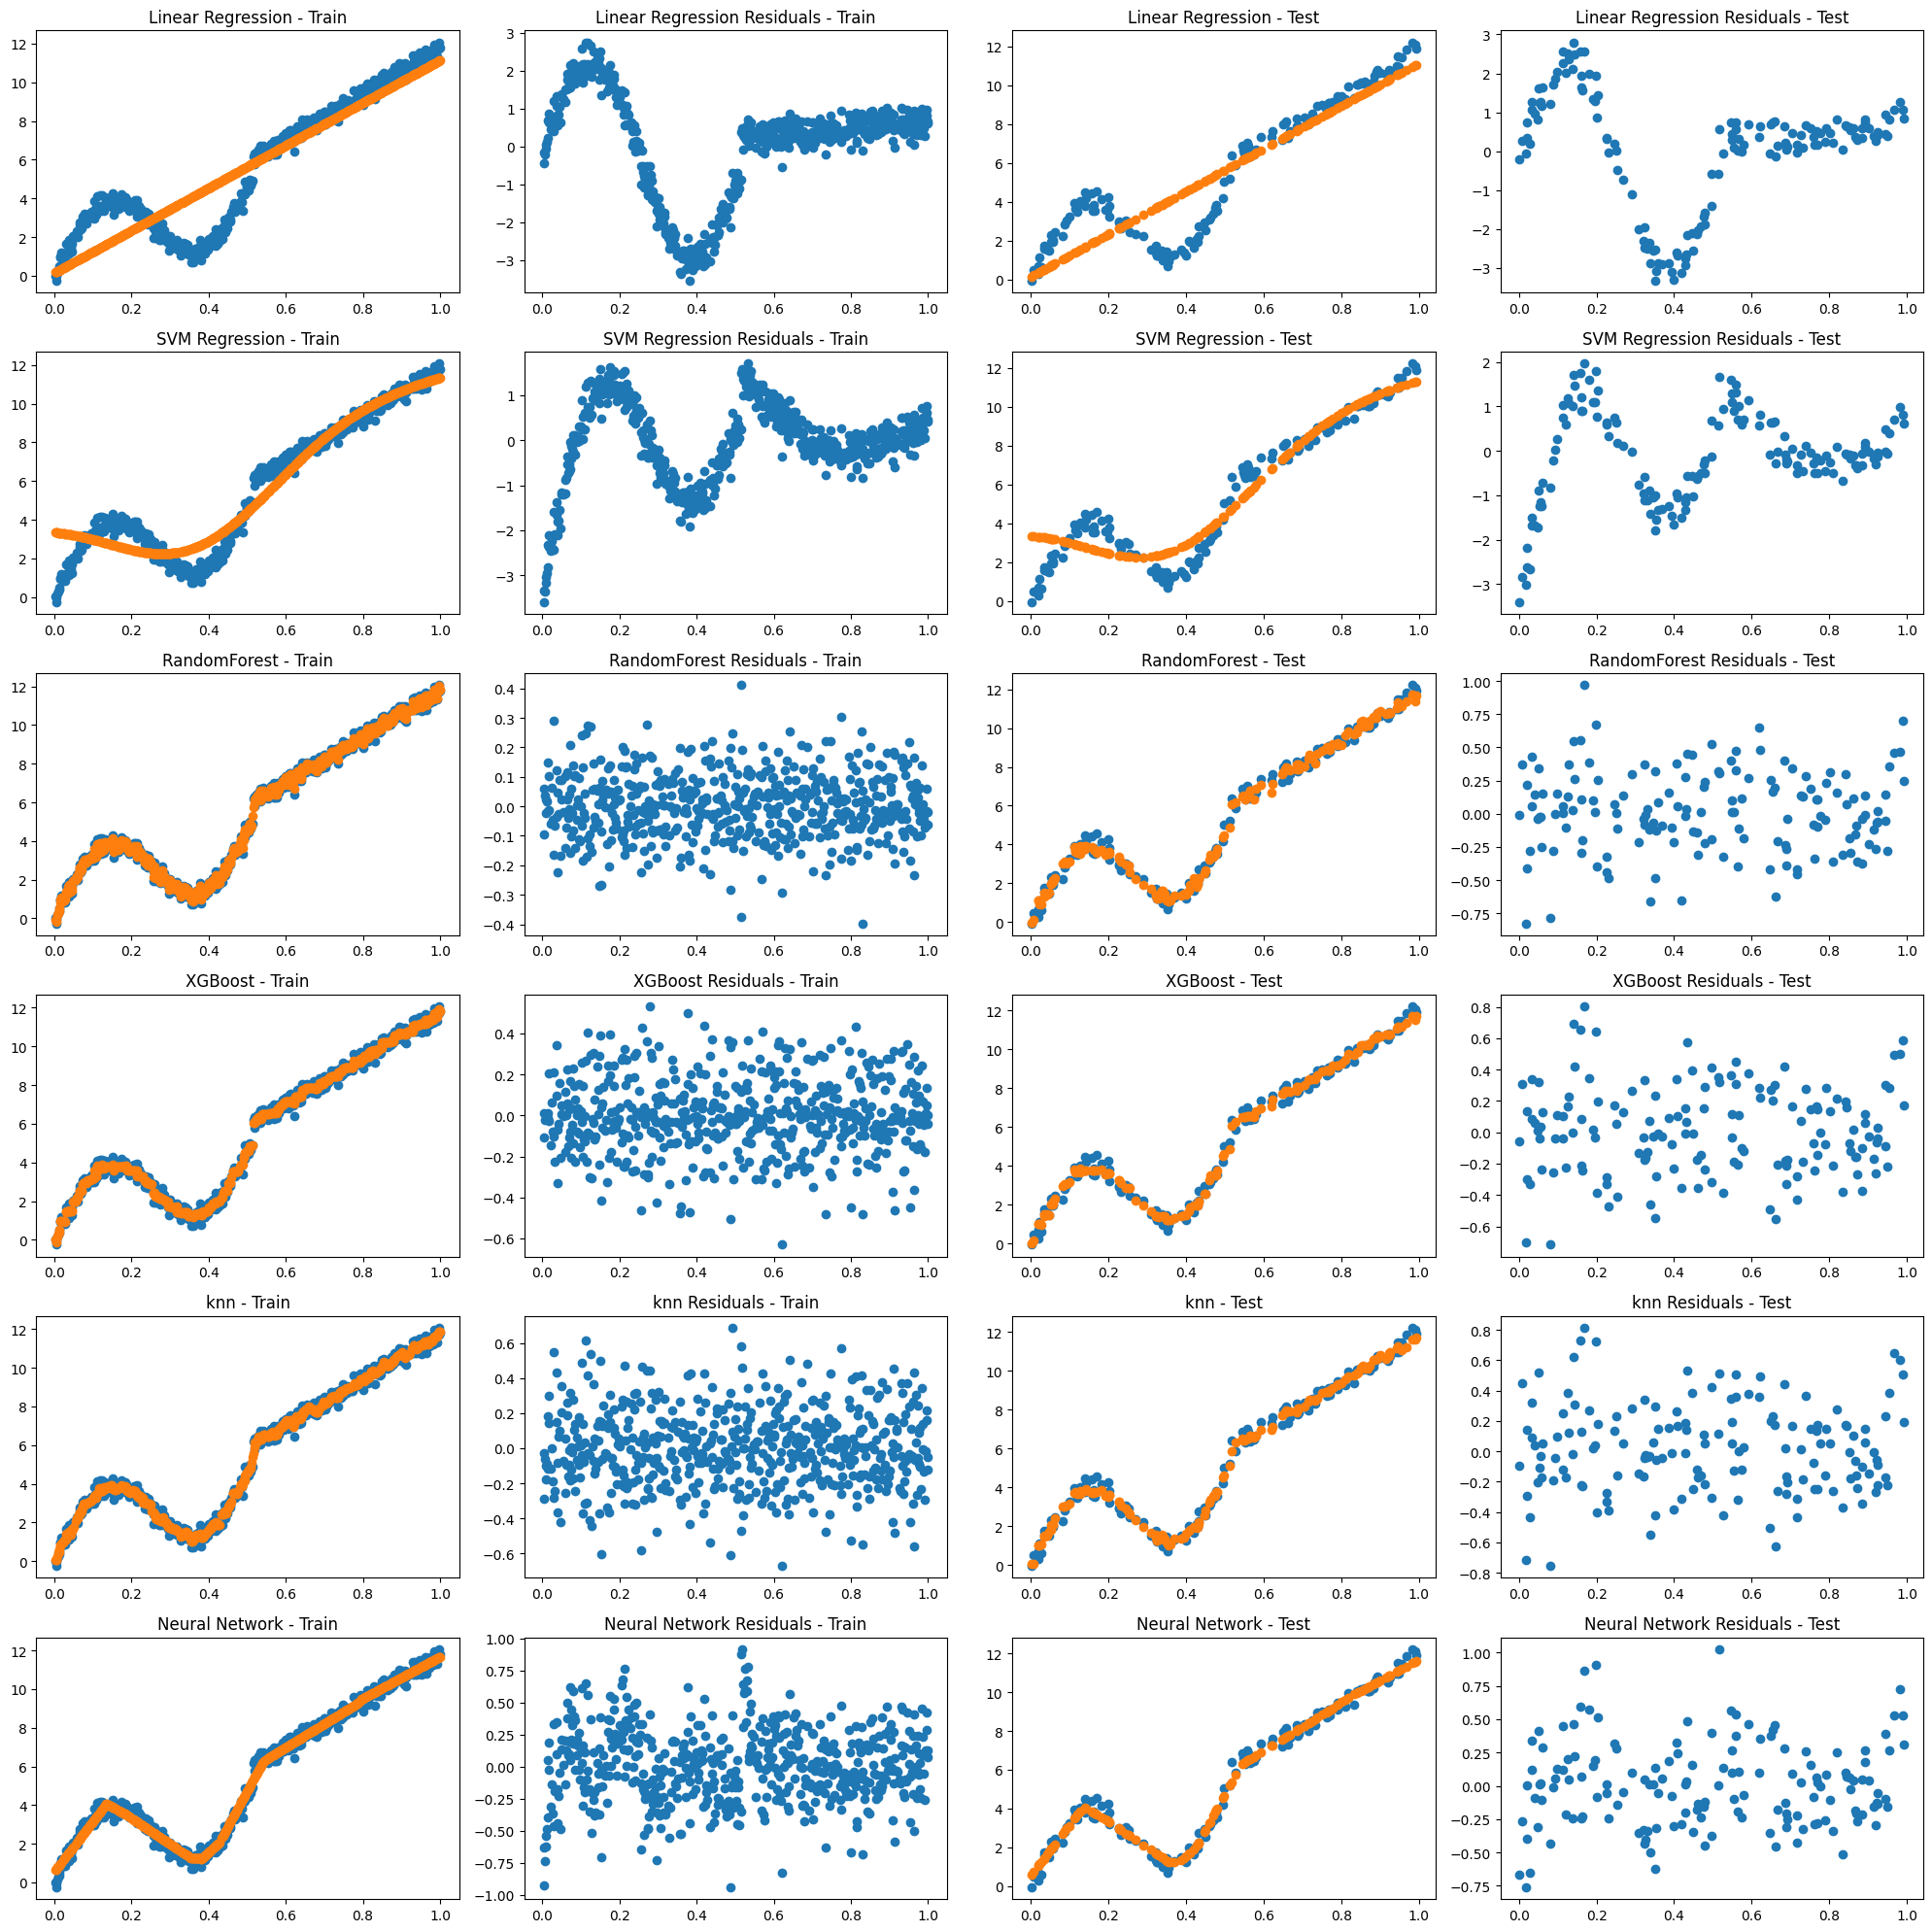

In [2]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read data from Excel file
file_path = 'E3-MLR3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Use PolynomialFeatures to create features 
deg = 1
poly = PolynomialFeatures(degree=deg)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

####################################
# Save the augmented data set to a file for review

# Create dataframe with test data and additional features
# Get feature names
feature_names = poly.get_feature_names_out(X_train.columns)
augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
augmented_data['y'] = test_data['y']

# Write dataframe to CSV
#augmented_data.to_csv(f'aug_deg_{deg}.csv', index=False)
####################################

# Algorithms
algorithms = {
    'Linear Regression': LinearRegression(),
    'SVM Regression': SVR(kernel='rbf'),  # Adjust kernel as needed
    'RandomForest': RandomForestRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=[20,20], max_iter=4000),
   # 'Elastic Net' : ElasticNet()
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

# Create a grid of subplots 
fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 20))
fig_row = -1

# Run the algorithms ... create metrics and plots 
for algorithm_name, algorithm in algorithms.items():
    
    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)
    
    # Test predictions
    y_test_pred = algorithm.predict(X_test_poly)

    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    # Test metrics
    r2_test = algorithm.score(X_test_poly, y_test)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    
    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)
    
    durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
    jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)
    
    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'MSE'] = mse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_test.at[algorithm_name, 'R-squared'] = r2_test
    metric_table_test.at[algorithm_name, 'MSE'] = mse_test
    metric_table_test.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_test
    metric_table_test.at[algorithm_name, 'Jarque-Bera'] = jb_stat_test
    metric_table_test.at[algorithm_name, 'JB P-value'] = jb_p_value_test
    
    # Create the plots
    fig_row = fig_row+1
    
    axs[fig_row, 0].scatter(train_data['x1'], y_train)
    axs[fig_row, 0].scatter(train_data['x1'], y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")
    
    axs[fig_row, 1].scatter(train_data['x1'], residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")
    
    axs[fig_row, 2].scatter(test_data['x1'], y_test)
    axs[fig_row, 2].scatter(test_data['x1'], y_test_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - Test")
    
    axs[fig_row, 3].scatter(test_data['x1'], residuals_test)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
############################

plt.tight_layout()
plt.show()

In [21]:
# Display metrics in tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

Metrics - Train Data:

                   R-squared       MSE  Durbin-Watson  Jarque-Bera    JB P-value
Linear Regression   0.976261  0.283320       0.417086    11.050745  3.984384e-03
SVM Regression      0.925630  0.887585       0.133550    32.441714  9.023421e-08
RandomForest        0.999024  0.011654       2.939398     4.578019  1.013668e-01
XGBoost             0.997146  0.034058       2.372918     1.046859  5.924852e-01
knn                 0.995895  0.048993       2.505231     0.733304  6.930509e-01
Neural Network      0.993560  0.076858       1.525945    14.869670  5.903263e-04
-------------------------------------------------
Metrics - Test Data:

                   R-squared       MSE  Durbin-Watson  Jarque-Bera  JB P-value
Linear Regression   0.972925  0.335644       0.528190     3.916151    0.141130
SVM Regression      0.907935  1.141326       0.153846     3.097042    0.212562
RandomForest        0.991856  0.100958       1.843063     0.076779    0.962338
XGBoost             0.